In [1]:
sc

In [2]:
#infile = 'data/pg2489.txt'
infile = 'sample_data/2701.txt'


In [3]:
from operator import add
f = sc.textFile(infile)

In [4]:
# look for lines with Ishmael
ishmaelLines = f.filter(lambda line: "Ishmael" in line)
ishmaelLines.first()

u'Call me Ishmael. Some years ago--never mind how long precisely--having'

In [5]:
ishmaelLines.count()

18

In [6]:
# look for lines with Ahab
ahablines = f.filter(lambda line: "Ahab" in line)
ahablines.count()

491

## My take on the ampcamp 5 exercises
#### data-exploration example
http://ampcamp.berkeley.edu/5/exercises/data-exploration-using-spark.html
1. load the file into an rdd (already did this above) as f.
2. take a peek a the data. Use the take operation of the RDD to get the first `K` Records (here K=10)

In [7]:
f.take(10)

[u'', u'', u'', u'', u'', u'', u'', u'', u'', u'MOBY DICK; OR THE WHALE']

Make this prettier by transversing the array

In [8]:
for x in f.take(30):
    print x










MOBY DICK; OR THE WHALE

By Herman Melville







ETYMOLOGY.

(Supplied by a Late Consumptive Usher to a Grammar School)

The pale Usher--threadbare in coat, heart, body, and brain; I see him
now. He was ever dusting his old lexicons and grammars, with a queer
handkerchief, mockingly embellished with all the gay flags of all
the known nations of the world. He loved to dust his old grammars; it
somehow mildly reminded him of his mortality.

"While you take in hand to school others, and to teach them by what


3. 3. Find out how many records are in this dataset.

In [14]:
f.count()

21715

* find out the word count

In [15]:
counts = f.flatMap(lambda line: line.split(" ")).map(lambda word: (word,1)).reduceByKey(lambda a, b: a+b)

In [16]:
counts.take(10
            )

[(u'', 4061),
 (u'funereal', 1),
 (u'unscientific', 1),
 (u'divinely', 2),
 (u'lime-stone,', 1),
 (u'shouted,', 1),
 (u'Virgin.', 2),
 (u'pitch-pot,', 1),
 (u'cod-liver', 1),
 (u'foul', 10)]

# Estimating Pi
This example uses the "throwing darts" at a circle method. Pick `n` random points in the unit square [(0,0),(1,1)] and see the fraction that fall in the unit circle. This should be equal to $\pi/4$.

In [19]:
import numpy as np
def sample(p):
    x,y = np.random(), np.random()
    return 1 if x*x + y*y < 1 else 0



In [20]:
pcount=sc.parallelize(xrange(0,1000)).map(sample).reduce(lambda a,b: a+b)
print "Pi is roughly %f"%(4.0*pcount/1000)

Py4JJavaError: An error occurred while calling z:org.apache.spark.api.python.PythonRDD.collectAndServe.
: org.apache.spark.SparkException: Job aborted due to stage failure: Task 65 in stage 15.0 failed 4 times, most recent failure: Lost task 65.3 in stage 15.0 (TID 1695, da74wbdn08.opr.statefarm.org): org.apache.spark.api.python.PythonException: Traceback (most recent call last):
  File "/data/hadoop-data/8/yarn/nm/usercache/kesj/appcache/application_1449878426981_2453/container_e17_1449878426981_2453_01_000012/pyspark.zip/pyspark/worker.py", line 111, in main
    process()
  File "/data/hadoop-data/8/yarn/nm/usercache/kesj/appcache/application_1449878426981_2453/container_e17_1449878426981_2453_01_000012/pyspark.zip/pyspark/worker.py", line 106, in process
    serializer.dump_stream(func(split_index, iterator), outfile)
  File "/data/hadoop-data/8/yarn/nm/usercache/kesj/appcache/application_1449878426981_2453/container_e17_1449878426981_2453_01_000012/pyspark.zip/pyspark/serializers.py", line 263, in dump_stream
    vs = list(itertools.islice(iterator, batch))
  File "/san-data/shared/spark/spark-1.6.0-bin-hadoop2.6/python/pyspark/rdd.py", line 792, in func
  File "<ipython-input-19-a886b70602da>", line 3, in sample
TypeError: 'module' object is not callable

	at org.apache.spark.api.python.PythonRunner$$anon$1.read(PythonRDD.scala:166)
	at org.apache.spark.api.python.PythonRunner$$anon$1.<init>(PythonRDD.scala:207)
	at org.apache.spark.api.python.PythonRunner.compute(PythonRDD.scala:125)
	at org.apache.spark.api.python.PythonRDD.compute(PythonRDD.scala:70)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:306)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:270)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:66)
	at org.apache.spark.scheduler.Task.run(Task.scala:89)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:213)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1145)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:615)
	at java.lang.Thread.run(Thread.java:745)

Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.org$apache$spark$scheduler$DAGScheduler$$failJobAndIndependentStages(DAGScheduler.scala:1431)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$abortStage$1.apply(DAGScheduler.scala:1419)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$abortStage$1.apply(DAGScheduler.scala:1418)
	at scala.collection.mutable.ResizableArray$class.foreach(ResizableArray.scala:59)
	at scala.collection.mutable.ArrayBuffer.foreach(ArrayBuffer.scala:47)
	at org.apache.spark.scheduler.DAGScheduler.abortStage(DAGScheduler.scala:1418)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$handleTaskSetFailed$1.apply(DAGScheduler.scala:799)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$handleTaskSetFailed$1.apply(DAGScheduler.scala:799)
	at scala.Option.foreach(Option.scala:236)
	at org.apache.spark.scheduler.DAGScheduler.handleTaskSetFailed(DAGScheduler.scala:799)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.doOnReceive(DAGScheduler.scala:1640)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:1599)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:1588)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:48)
	at org.apache.spark.scheduler.DAGScheduler.runJob(DAGScheduler.scala:620)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:1832)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:1845)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:1858)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:1929)
	at org.apache.spark.rdd.RDD$$anonfun$collect$1.apply(RDD.scala:927)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:150)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:111)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:316)
	at org.apache.spark.rdd.RDD.collect(RDD.scala:926)
	at org.apache.spark.api.python.PythonRDD$.collectAndServe(PythonRDD.scala:405)
	at org.apache.spark.api.python.PythonRDD.collectAndServe(PythonRDD.scala)
	at sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at sun.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:57)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:606)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:231)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:381)
	at py4j.Gateway.invoke(Gateway.java:259)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:133)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.GatewayConnection.run(GatewayConnection.java:209)
	at java.lang.Thread.run(Thread.java:745)
Caused by: org.apache.spark.api.python.PythonException: Traceback (most recent call last):
  File "/data/hadoop-data/8/yarn/nm/usercache/kesj/appcache/application_1449878426981_2453/container_e17_1449878426981_2453_01_000012/pyspark.zip/pyspark/worker.py", line 111, in main
    process()
  File "/data/hadoop-data/8/yarn/nm/usercache/kesj/appcache/application_1449878426981_2453/container_e17_1449878426981_2453_01_000012/pyspark.zip/pyspark/worker.py", line 106, in process
    serializer.dump_stream(func(split_index, iterator), outfile)
  File "/data/hadoop-data/8/yarn/nm/usercache/kesj/appcache/application_1449878426981_2453/container_e17_1449878426981_2453_01_000012/pyspark.zip/pyspark/serializers.py", line 263, in dump_stream
    vs = list(itertools.islice(iterator, batch))
  File "/san-data/shared/spark/spark-1.6.0-bin-hadoop2.6/python/pyspark/rdd.py", line 792, in func
  File "<ipython-input-19-a886b70602da>", line 3, in sample
TypeError: 'module' object is not callable

	at org.apache.spark.api.python.PythonRunner$$anon$1.read(PythonRDD.scala:166)
	at org.apache.spark.api.python.PythonRunner$$anon$1.<init>(PythonRDD.scala:207)
	at org.apache.spark.api.python.PythonRunner.compute(PythonRDD.scala:125)
	at org.apache.spark.api.python.PythonRDD.compute(PythonRDD.scala:70)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:306)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:270)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:66)
	at org.apache.spark.scheduler.Task.run(Task.scala:89)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:213)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1145)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:615)
	... 1 more


In [13]:
enPages = f.filter(lambda x: x.split(" ")[1]=="en")#.cache()
enPages.count()

Py4JJavaError: An error occurred while calling z:org.apache.spark.api.python.PythonRDD.collectAndServe.
: org.apache.spark.SparkException: Job aborted due to stage failure: Task 0 in stage 9.0 failed 4 times, most recent failure: Lost task 0.3 in stage 9.0 (TID 267, da74wbdn16.opr.statefarm.org): org.apache.spark.api.python.PythonException: Traceback (most recent call last):
  File "/data/hadoop-data/2/yarn/nm/usercache/kesj/appcache/application_1449878426981_2453/container_e17_1449878426981_2453_01_000018/pyspark.zip/pyspark/worker.py", line 111, in main
    process()
  File "/data/hadoop-data/2/yarn/nm/usercache/kesj/appcache/application_1449878426981_2453/container_e17_1449878426981_2453_01_000018/pyspark.zip/pyspark/worker.py", line 106, in process
    serializer.dump_stream(func(split_index, iterator), outfile)
  File "/san-data/shared/spark/spark-1.6.0-bin-hadoop2.6/python/pyspark/rdd.py", line 2346, in pipeline_func
  File "/san-data/shared/spark/spark-1.6.0-bin-hadoop2.6/python/pyspark/rdd.py", line 2346, in pipeline_func
  File "/san-data/shared/spark/spark-1.6.0-bin-hadoop2.6/python/pyspark/rdd.py", line 2346, in pipeline_func
  File "/san-data/shared/spark/spark-1.6.0-bin-hadoop2.6/python/pyspark/rdd.py", line 317, in func
  File "/san-data/shared/spark/spark-1.6.0-bin-hadoop2.6/python/pyspark/rdd.py", line 1004, in <lambda>
  File "/san-data/shared/spark/spark-1.6.0-bin-hadoop2.6/python/pyspark/rdd.py", line 1004, in <genexpr>
  File "<ipython-input-13-b4b6cc896ae9>", line 1, in <lambda>
IndexError: list index out of range

	at org.apache.spark.api.python.PythonRunner$$anon$1.read(PythonRDD.scala:166)
	at org.apache.spark.api.python.PythonRunner$$anon$1.<init>(PythonRDD.scala:207)
	at org.apache.spark.api.python.PythonRunner.compute(PythonRDD.scala:125)
	at org.apache.spark.api.python.PythonRDD.compute(PythonRDD.scala:70)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:306)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:270)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:66)
	at org.apache.spark.scheduler.Task.run(Task.scala:89)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:213)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1145)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:615)
	at java.lang.Thread.run(Thread.java:745)

Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.org$apache$spark$scheduler$DAGScheduler$$failJobAndIndependentStages(DAGScheduler.scala:1431)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$abortStage$1.apply(DAGScheduler.scala:1419)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$abortStage$1.apply(DAGScheduler.scala:1418)
	at scala.collection.mutable.ResizableArray$class.foreach(ResizableArray.scala:59)
	at scala.collection.mutable.ArrayBuffer.foreach(ArrayBuffer.scala:47)
	at org.apache.spark.scheduler.DAGScheduler.abortStage(DAGScheduler.scala:1418)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$handleTaskSetFailed$1.apply(DAGScheduler.scala:799)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$handleTaskSetFailed$1.apply(DAGScheduler.scala:799)
	at scala.Option.foreach(Option.scala:236)
	at org.apache.spark.scheduler.DAGScheduler.handleTaskSetFailed(DAGScheduler.scala:799)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.doOnReceive(DAGScheduler.scala:1640)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:1599)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:1588)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:48)
	at org.apache.spark.scheduler.DAGScheduler.runJob(DAGScheduler.scala:620)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:1832)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:1845)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:1858)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:1929)
	at org.apache.spark.rdd.RDD$$anonfun$collect$1.apply(RDD.scala:927)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:150)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:111)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:316)
	at org.apache.spark.rdd.RDD.collect(RDD.scala:926)
	at org.apache.spark.api.python.PythonRDD$.collectAndServe(PythonRDD.scala:405)
	at org.apache.spark.api.python.PythonRDD.collectAndServe(PythonRDD.scala)
	at sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at sun.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:57)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:606)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:231)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:381)
	at py4j.Gateway.invoke(Gateway.java:259)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:133)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.GatewayConnection.run(GatewayConnection.java:209)
	at java.lang.Thread.run(Thread.java:745)
Caused by: org.apache.spark.api.python.PythonException: Traceback (most recent call last):
  File "/data/hadoop-data/2/yarn/nm/usercache/kesj/appcache/application_1449878426981_2453/container_e17_1449878426981_2453_01_000018/pyspark.zip/pyspark/worker.py", line 111, in main
    process()
  File "/data/hadoop-data/2/yarn/nm/usercache/kesj/appcache/application_1449878426981_2453/container_e17_1449878426981_2453_01_000018/pyspark.zip/pyspark/worker.py", line 106, in process
    serializer.dump_stream(func(split_index, iterator), outfile)
  File "/san-data/shared/spark/spark-1.6.0-bin-hadoop2.6/python/pyspark/rdd.py", line 2346, in pipeline_func
  File "/san-data/shared/spark/spark-1.6.0-bin-hadoop2.6/python/pyspark/rdd.py", line 2346, in pipeline_func
  File "/san-data/shared/spark/spark-1.6.0-bin-hadoop2.6/python/pyspark/rdd.py", line 2346, in pipeline_func
  File "/san-data/shared/spark/spark-1.6.0-bin-hadoop2.6/python/pyspark/rdd.py", line 317, in func
  File "/san-data/shared/spark/spark-1.6.0-bin-hadoop2.6/python/pyspark/rdd.py", line 1004, in <lambda>
  File "/san-data/shared/spark/spark-1.6.0-bin-hadoop2.6/python/pyspark/rdd.py", line 1004, in <genexpr>
  File "<ipython-input-13-b4b6cc896ae9>", line 1, in <lambda>
IndexError: list index out of range

	at org.apache.spark.api.python.PythonRunner$$anon$1.read(PythonRDD.scala:166)
	at org.apache.spark.api.python.PythonRunner$$anon$1.<init>(PythonRDD.scala:207)
	at org.apache.spark.api.python.PythonRunner.compute(PythonRDD.scala:125)
	at org.apache.spark.api.python.PythonRDD.compute(PythonRDD.scala:70)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:306)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:270)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:66)
	at org.apache.spark.scheduler.Task.run(Task.scala:89)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:213)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1145)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:615)
	... 1 more


In [63]:
#ASIDE
a = ishmaelLines.first()
print a


Call me Ishmael.  Some years ago--never mind how long precisely--


In [70]:
c = '"I say, Queequeg! why don\'t you speak?  It\'s I--Ishmael."  But all'
print c

"I say, Queequeg! why don't you speak?  It's I--Ishmael."  But all


In [80]:
import re
pattern1 = re.compile(r'"|[ ]+|; ?|, ?|! ?|\? ?|\. ?|--')

In [81]:
re.split(pattern1,c)

['',
 'I',
 'say',
 'Queequeg',
 'why',
 "don't",
 'you',
 'speak',
 '',
 "It's",
 'I',
 'Ishmael',
 '',
 '',
 'But',
 'all']

In [96]:
IshmWords = ishmaelLines.flatMap(lambda x: re.split(pattern1,x)).filter(lambda x: len(x)>0)
IshmWC = IshmWords.map(lambda x: (x, 1)).reduceByKey(add)

In [95]:
IshmWC.saveAsTextFile("data/ishmaelWC")

In [97]:
# print out the K,V pairs
for (word, count) in IshmWC.collect():
    print "{0}: {1}".format(word,count)

this: 1
all: 3
ago: 1
backing: 1
Some: 1
mind: 1
didn't: 1
rest: 1
shouts: 1
go: 4
say: 2
been: 1
Call: 1
But: 3
have: 1
dear: 1
thyself: 1
Ishmael's: 1
muttered: 1
for: 2
oarsman: 1
inquire: 1
thy: 1
explain: 1
had: 2
long: 1
the: 9
I: 8
read: 1
witness: 1
which: 1
unlettered: 1
robe: 1
was: 1
price: 1
Ishmael: 18
A: 1
me: 2
teeth-gnashing: 1
may: 1
fate: 1
infallibly: 1
Well: 1
dive: 1
ye: 2
buffalo: 1
here: 1
Explain: 1
So: 1
magnanimous: 1
awful: 1
whale: 1
with: 1
you: 7
is: 1
a: 4
down: 1
myself: 2
last: 1
would: 1
surrenderest: 1
these: 1
my: 2
wherever: 1
as: 1
thou: 1
hypo: 1
suppose: 1
hope: 1
hear: 1
Yes: 1
Queequeg: 1
shaking: 1
away: 1
vessel: 1
gone: 2
don't: 2
It's: 1
Do: 1
it: 1
years: 1
How: 1
pieces: 1
are: 1
in: 1
crew: 1
precisely: 1
full-grown: 1
mere: 1
out: 1
one: 1
hundredth: 1
said: 2
how: 3
veritable: 1
there: 1
three: 1
who: 1
should: 1
to: 8
that: 4
God: 1
before: 1
Ha: 1
Chaldee: 1
then: 1
sure: 1
deeper: 1
than: 1
get: 1
why: 1
never: 1
Can: 1
speak: 1
lan

In [102]:
IshmWC.filter(lambda x: x[1]> 10).max()


(u'Ishmael', 18)

In [108]:
IshmWC.count() #yields the number of distinct keys (words) in this subset

132

In [112]:
# sorting data based upon the Key
IshmWC.sortByKey(ascending=True).collect()

[(u'A', 1),
 (u'But', 3),
 (u'Call', 1),
 (u'Can', 1),
 (u'Chaldee', 1),
 (u'Do', 1),
 (u'Explain', 1),
 (u'God', 1),
 (u'Ha', 1),
 (u'How', 1),
 (u'I', 8),
 (u'Ishmael', 18),
 (u"Ishmael's", 1),
 (u"It's", 1),
 (u'Queequeg', 1),
 (u'So', 1),
 (u'Some', 1),
 (u'Well', 1),
 (u'Yes', 1),
 (u'a', 4),
 (u'ago', 1),
 (u'all', 3),
 (u'are', 1),
 (u'as', 1),
 (u'at', 1),
 (u'away', 1),
 (u'awful', 1),
 (u'backing', 1),
 (u'be', 2),
 (u'been', 1),
 (u'before', 1),
 (u'buffalo', 1),
 (u'can', 1),
 (u'crew', 1),
 (u'dear', 1),
 (u'deeper', 1),
 (u"didn't", 1),
 (u'dive', 1),
 (u"don't", 2),
 (u'down', 1),
 (u'explain', 1),
 (u'fate', 1),
 (u'for', 2),
 (u'full-grown', 1),
 (u'get', 1),
 (u'go', 4),
 (u'gone', 2),
 (u'had', 2),
 (u'have', 1),
 (u'hear', 1),
 (u'heaven', 1),
 (u'here', 1),
 (u'hitherto', 1),
 (u'hope', 1),
 (u'how', 3),
 (u'hundredth', 1),
 (u'hypo', 1),
 (u'if', 1),
 (u'in', 1),
 (u'infallibly', 1),
 (u'inquire', 1),
 (u'is', 1),
 (u'it', 1),
 (u'land', 1),
 (u'last', 1),
 (u'lay

In [117]:
# to sort by Value do a swap between key & value and then sort
IshmWC.map(lambda (x,y): (y,x)).sortByKey().top(10)    

[(18, u'Ishmael'),
 (9, u'the'),
 (8, u'to'),
 (8, u'I'),
 (7, u'you'),
 (5, u'of'),
 (4, u'that'),
 (4, u'go'),
 (4, u'a'),
 (3, u'how')]

## Apply this to the whole file:
1. read in the file
2. use flatMap to split each line into words based upon the regex pattern
3. remove splits with no length (filter)
4. use map to assign a value 1 to each key (word)
5. use reduceByKey to produce a tally(word count) for each word
6. save this output

In [119]:
f = sc.textFile(infile)
wc = f.flatMap(lambda x: re.split(pattern1,x)).filter(lambda x: len(x)>0).map(lambda x: (x, 1)).reduceByKey(add)
wc.saveAsTextFile("data/wc_out")

In [120]:
print "This results in {0} unique words".format(wc.count())

This results in 21130 unique words


## To find the most common words use this swap trick

In [125]:
wc.map(lambda (x,y): (y,x)).sortByKey().top(30) 

[(13762, u'the'),
 (6523, u'of'),
 (6023, u'and'),
 (4550, u'a'),
 (4523, u'to'),
 (3910, u'in'),
 (2912, u'that'),
 (2470, u'his'),
 (2137, u'it'),
 (1972, u'I'),
 (1704, u'is'),
 (1662, u'with'),
 (1629, u'was'),
 (1614, u'as'),
 (1565, u'he'),
 (1442, u'all'),
 (1409, u'for'),
 (1269, u'this'),
 (1231, u'at'),
 (1133, u'by'),
 (1107, u'but'),
 (1102, u'not'),
 (1058, u'from'),
 (1056, u'him'),
 (1027, u'be'),
 (1007, u'on'),
 (917, u'so'),
 (872, u'one'),
 (834, u'you'),
 (767, u'had')]

## Reproducing the Monte Carlo Pi estimation

In [126]:
from random import random
#define the slices as 2
slices = 2
n = 100000*slices

In [127]:
def f(_):
    x = random()*2-1
    y = random()*2 -1
    return 1 if x**2 + y**2 < 1 else 0

In [128]:
count = sc.parallelize(xrange(1,n+1),slices).map(f).reduce(add)
print "Pi is roughly {0}".format((4.0 *count/float(n)))

Pi is roughly 3.14582


### Kmeans in python example

In [2]:
from time import time
import numpy as np
import pylab as pl

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

np.random.seed(42)

digits = load_digits()
data = scale(digits.data)

n_samples, n_features = data.shape
n_digits = len(np.unique(digits.target))
labels = digits.target

sample_size = 300

print("n_digits: %d, \t n_samples %d, \t n_features %d"
      % (n_digits, n_samples, n_features))


n_digits: 10, 	 n_samples 1797, 	 n_features 64


In [3]:
print(79 * '_')
print('% 9s' % 'init'
      '    time  inertia    homo   compl  v-meas     ARI AMI  silhouette')


def bench_k_means(estimator, name, data):
    t0 = time()
    estimator.fit(data)
    print('% 9s   %.2fs    %i   %.3f   %.3f   %.3f   %.3f   %.3f    %.3f'
          % (name, (time() - t0), estimator.inertia_,
             metrics.homogeneity_score(labels, estimator.labels_),
             metrics.completeness_score(labels, estimator.labels_),
             metrics.v_measure_score(labels, estimator.labels_),
             metrics.adjusted_rand_score(labels, estimator.labels_),
             metrics.adjusted_mutual_info_score(labels,  estimator.labels_),
             metrics.silhouette_score(data, estimator.labels_,
                                      metric='euclidean',
                                      sample_size=sample_size)))


_______________________________________________________________________________
init    time  inertia    homo   compl  v-meas     ARI AMI  silhouette


In [4]:
bench_k_means(KMeans(init='k-means++', n_clusters=n_digits, n_init=10),
              name="k-means++", data=data)

bench_k_means(KMeans(init='random', n_clusters=n_digits, n_init=10),
              name="random", data=data)

# in this case the seeding of the centers is deterministic, hence we run the
# kmeans algorithm only once with n_init=1
pca = PCA(n_components=n_digits).fit(data)
bench_k_means(KMeans(init=pca.components_, n_clusters=n_digits, n_init=1),
              name="PCA-based",
              data=data)
print(79 * '_')


k-means++   0.84s    69432   0.602   0.650   0.625   0.465   0.598    0.146
   random   0.64s    69694   0.669   0.710   0.689   0.553   0.666    0.147
PCA-based   0.05s    71820   0.673   0.715   0.693   0.567   0.670    0.150
_______________________________________________________________________________


In [6]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


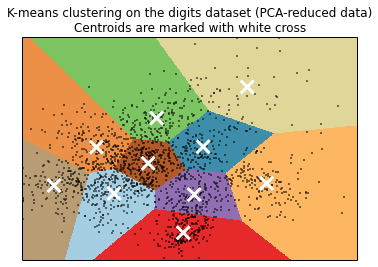

In [7]:
###############################################################################
# Visualize the results on PCA-reduced data

reduced_data = PCA(n_components=2).fit_transform(data)
kmeans = KMeans(init='k-means++', n_clusters=n_digits, n_init=10)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, m_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() + 1, reduced_data[:, 0].max() - 1
y_min, y_max = reduced_data[:, 1].min() + 1, reduced_data[:, 1].max() - 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
pl.figure(1)
pl.clf()
pl.imshow(Z, interpolation='nearest',
          extent=(xx.min(), xx.max(), yy.min(), yy.max()),
          cmap=pl.cm.Paired,
          aspect='auto', origin='lower')

pl.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
pl.scatter(centroids[:, 0], centroids[:, 1],
           marker='x', s=169, linewidths=3,
           color='w', zorder=10)
pl.title('K-means clustering on the digits dataset (PCA-reduced data)\n'
         'Centroids are marked with white cross')
pl.xlim(x_min, x_max)
pl.ylim(y_min, y_max)
pl.xticks(())
pl.yticks(())
pl.show()

### code grabbed from http://ufal.mff.cuni.cz/~straka/courses/npfl102/2014/handout09.pdf
from nl t k . t o k e ni z e import w o r d p u n c t t o k e ni z e

from pyspark import SparkConf , SparkContext

import s y s

if len ( s y s . argv ) < 4 :
pr int >>s y s . s t d e r r , ”Usage : %s master i n p u t output ” % s y s . argv [ 0 ]
e x i t ( 1 )
s c = SparkContext ( s y s . argv [ 1 ] , ”Word count ” )
f i l e = s c . t e x t F i l e ( s y s . argv [ 2 ] )
c oun t s = f i l e . flatMap (lambda x : w o r d p u n c t t o k e ni z e ( x ) ) \
. map(lambda x : ( x , 1 ) ) \
. reduceByKey (lambda x , y : x + y )
c oun t s .map(lambda ( x , y ) : ”%s\t%d” % ( x , y ) ) \
. s a veA sTe x tFile ( s y s . argv [ 3 ] )

In [ ]:
wc